## pRNN Tutorial

In [14]:
#import the pRNN class
from prnn.utils.predictiveNet import PredictiveNet

from prnn.utils.env import make_env
from prnn.utils.agent import RandomActionAgent


import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Make a gridworld environment
env_package = 'gym-minigrid' 
env_key = 'MiniGrid-LRoom-18x18-v0'
act_enc = 'SpeedHD' #actions will be encoded as speed and one hot-encoded head direction

env = make_env(env_key=env_key, package=env_package, act_enc=act_enc)

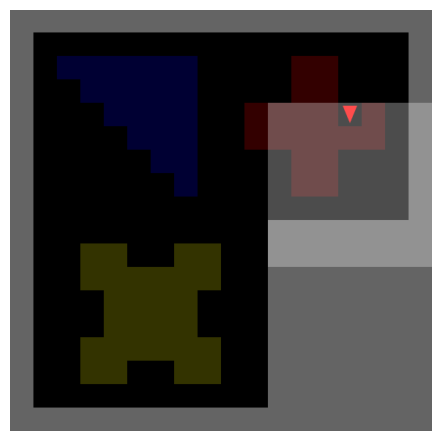

In [3]:
#Let's take a look at the environment
env.reset()
render = env.render()

plt.figure()
plt.subplot(1,1,1)
plt.imshow(render)
plt.tight_layout()
plt.axis('off')
plt.show()


In [5]:
#specify an action policy (agent)
action_probability = np.array([0.15,0.15,0.6,0.1,0,0,0])
agent = RandomActionAgent(env.action_space, action_probability)


In [4]:
#Make a pRNN
num_neurons = 500
pRNNtype = "Masked"

predictiveNet = PredictiveNet(env, hidden_size=num_neurons, pRNNtype=pRNNtype, k = 5, use_LN = True)

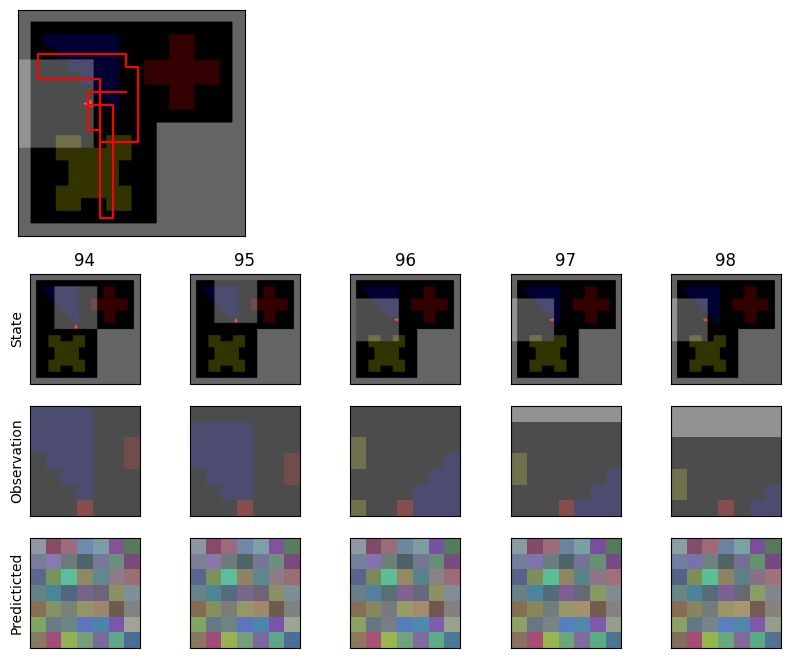

In [6]:
#run a sample trajectory (note: predictions will be garbage, agent is untrained)
predictiveNet.plotSampleTrajectory(env,agent, savename = "traj_pre", savefolder = "docs/_static")
plt.show()


In [ ]:
#Run one training epoch of 500 trials, each 500 steps long
# If using CPU, consider reducing these numbers to speed up training
sequence_duration = 50 # minimum 6
num_trials = 50 # minimum 6 (why is this the case...)

predictiveNet.trainingEpoch(env, agent,
                            sequence_duration=sequence_duration,
                            num_trials=num_trials)

Training pRNN on cpu...
loss: 0.025, sparsity: 3.8, meanrate: 0.37 [    0\   50]
loss: 0.022, sparsity: 3.9, meanrate: 0.38 [    5\   50]
loss: 0.019, sparsity: 3.9, meanrate: 0.39 [   10\   50]
loss: 0.015, sparsity: 4.0, meanrate: 0.39 [   15\   50]
loss: 0.021, sparsity: 4.0, meanrate: 0.39 [   20\   50]
loss: 0.016, sparsity: 4.1, meanrate: 0.4 [   25\   50]
loss: 0.015, sparsity: 4.1, meanrate: 0.4 [   30\   50]
loss: 0.018, sparsity: 4.1, meanrate: 0.4 [   35\   50]
loss: 0.016, sparsity: 4.1, meanrate: 0.4 [   40\   50]
loss: 0.016, sparsity: 4.1, meanrate: 0.4 [   45\   50]
loss: 0.016, sparsity: 4.2, meanrate: 0.4 [   49\   50]
Epoch Complete. Back to the cpu


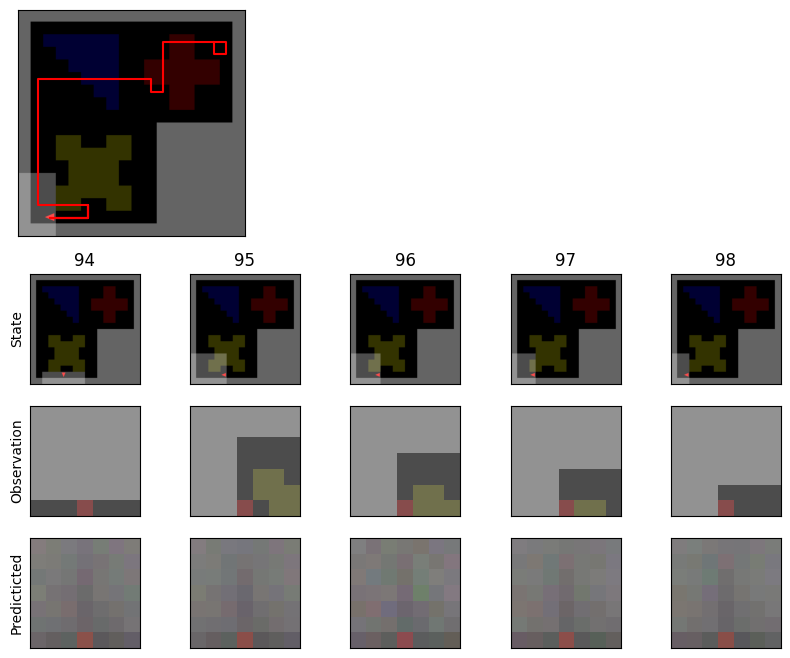

/gpfs/radev/home/ac3787/.conda/envs/prnn_tutorial/lib/python3.9/site-packages/pynapple/process/tuning_curves.py:378: RuntimeWarning: invalid value encountered in divide
  fxfr = fx / fr
/gpfs/radev/home/ac3787/.conda/envs/prnn_tutorial/lib/python3.9/site-packages/pynapple/process/tuning_curves.py:389: RuntimeWarning: invalid value encountered in divide
  SI = SI / fr[:, 0, 0]


Training Decoder on cpu...
loss: 5.867989 [    0\ 5000]
loss: 4.500637 [  500\ 5000]
loss: 4.228433 [ 1000\ 5000]
loss: 4.067019 [ 1500\ 5000]
loss: 3.946470 [ 2000\ 5000]
loss: 3.852988 [ 2500\ 5000]
loss: 3.768631 [ 3000\ 5000]
loss: 3.735565 [ 3500\ 5000]
loss: 3.673484 [ 4000\ 5000]
loss: 3.641411 [ 4500\ 5000]
loss: 3.605587 [ 4999\ 5000]
Training Complete. Back to the cpu


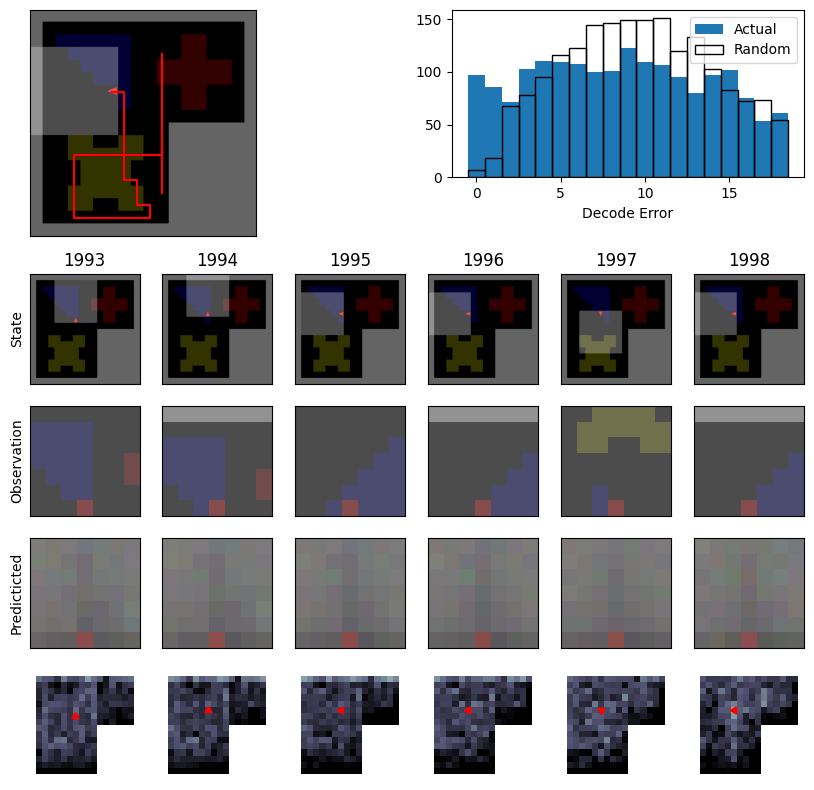

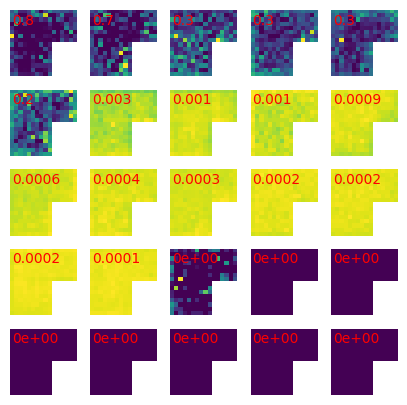

In [8]:
#run a sample trajectory. did the predictions get better?
predictiveNet.plotSampleTrajectory(env,agent, savename = "traj_post", savefolder = "docs/_static")
plt.show()

#Let's take a look at the spatial position decoding and tuning curves 
place_fields, SI, decoder = predictiveNet.calculateSpatialRepresentation(env,agent,
                                                trainDecoder=True, saveTrainingData=True)

predictiveNet.calculateDecodingPerformance(env,agent,decoder)
predictiveNet.plotTuningCurvePanel()

In [9]:
obs, act, state, render = predictiveNet.collectObservationSequence(env,agent,10,discretize=True, includeRender =True)
obs_pred, obs_next, h  = predictiveNet.predict(obs,act, fullRNNstate=False)


In [10]:
print(h.shape)

torch.Size([1, 10, 500])


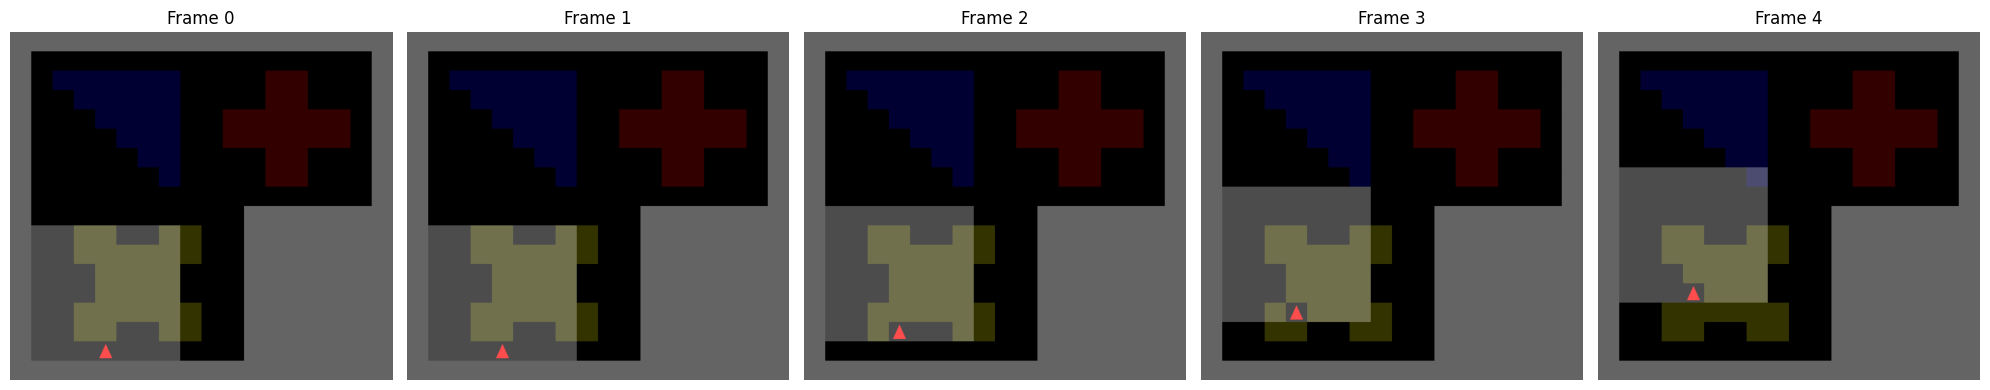

In [11]:
fig, axes = plt.subplots(1, 5, figsize=(20,4))

for i, ax in enumerate(axes):
    im = ax.imshow(render[i], aspect = 'auto')
    ax.set_title(f"Frame {i}")
    ax.axis('off')

plt.tight_layout()
plt.savefig(f"docs/_static/Masked_5frames")
plt.show()

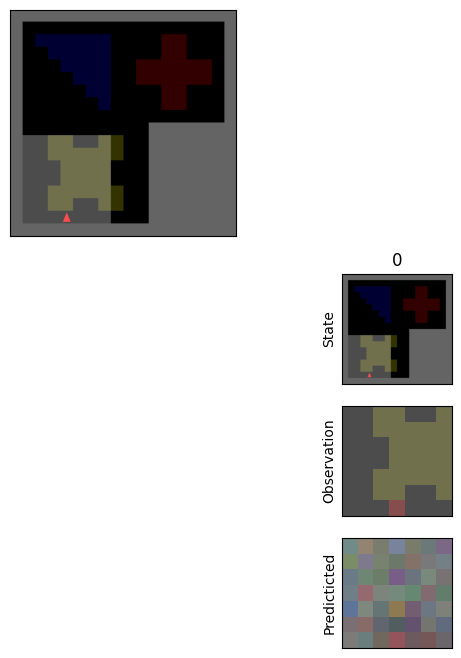

In [12]:
predictiveNet.plotObservationSequence(obs, render, obs_pred, state)

